<a href="https://colab.research.google.com/github/akasenomm/Golf-game/blob/main/AI_kodutoo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LTAT.01.003 Tehisintellekt
## Kevad 2024
## Kodutöö 5: pilditöötlus

Töölehe struktuuri muuta ei tohi, lisada ei tohi uusi lahtreid ega eemaldada praeguseid (vajalikud lahtrite ID-d on paigas). Esitama peab ainult käesoleva töölehe lahendatud kujul ning eelnevalt käivitatuna, et väljundid oleksid näha.

Töö koosneb mitmest osast, kuid lugege ülesannete tekstid eelnevalt läbi, et poleks vaja hiljem ümber teha.

## Ülesanne 1. Testandmete genereerimine tehisintellekti abil

In [ ]:
# Moodulite installeerimine ja importimine
!pip install accelerate -q
!pip install diffusers -q
!pip install transformers ftfy accelerate -q
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
import numpy as np
import cv2 as cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 963.8 kB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### 1.1. Tehisintellekti abil sobivate piltide genereerimine.

In [ ]:
# Loome "toru"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
prompt = "truck"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

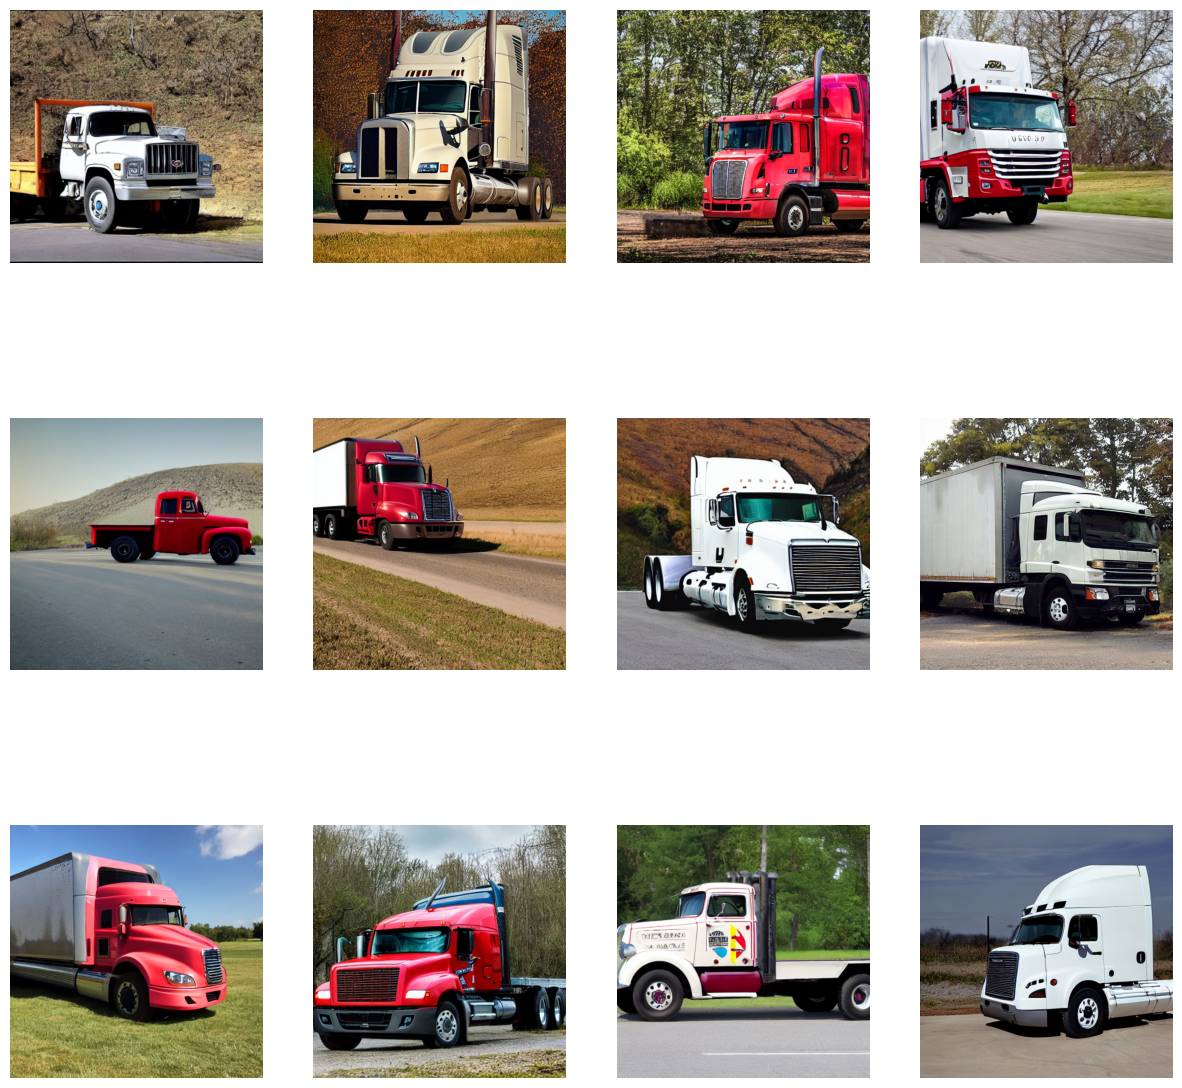

In [ ]:
# Generate 12 different pictures and display them
images = [pipe(prompt).images[0] for _ in range(12)]
fig, axs = plt.subplots(3, 4, figsize=(15, 15))
for i, img in enumerate(images):
    ax = axs[i // 4, i % 4]
    ax.imshow(img)
    ax.axis('off')

plt.show()

### 1.2. Objektituvastusmeetodiga loodud objektide tuvastamine ja vähemalt 10 erineva testpildi loomine (suuruses 32*32 pikslit).

In [ ]:
!pip install ultralytics==8.2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.1/752.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov9c.pt")

100%|██████████| 49.4M/49.4M [00:00<00:00, 161MB/s]



0: 640x640 1 truck, 61.7ms
Speed: 48.9ms preprocess, 61.7ms inference, 499.8ms postprocess per image at shape (1, 3, 640, 640)


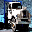


0: 640x640 1 truck, 50.0ms
Speed: 3.2ms preprocess, 50.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


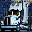


0: 640x640 1 truck, 50.0ms
Speed: 3.4ms preprocess, 50.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


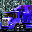


0: 640x640 1 truck, 43.4ms
Speed: 3.7ms preprocess, 43.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


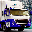


0: 640x640 1 truck, 36.3ms
Speed: 3.3ms preprocess, 36.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


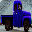


0: 640x640 1 truck, 38.6ms
Speed: 3.3ms preprocess, 38.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


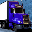


0: 640x640 1 truck, 35.9ms
Speed: 4.1ms preprocess, 35.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


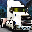


0: 640x640 1 truck, 36.6ms
Speed: 3.4ms preprocess, 36.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


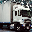


0: 640x640 1 truck, 31.2ms
Speed: 3.5ms preprocess, 31.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


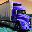


0: 640x640 1 truck, 53.7ms
Speed: 15.3ms preprocess, 53.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


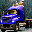


0: 640x640 1 truck, 49.6ms
Speed: 3.6ms preprocess, 49.6ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 640)


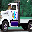


0: 640x640 1 truck, 50.7ms
Speed: 11.9ms preprocess, 50.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


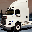

In [ ]:
from google.colab.patches import cv2_imshow

sizedImages = []
for image in images:
  predictions = model.predict(image)
  names = model.names
  img = np.array(image) # image to array representation
  for i in range(len(predictions[0].boxes.cls)):
    coords = [int(x) for x in predictions[0].boxes.xyxy[i]]
    cropped = img[coords[1]:coords[3], coords[0]:coords[2]]
    # Resize the cropped image to 32x32 pixels
    resized = cv.resize(cropped, (32, 32))
    cv2_imshow(resized)
    sizedImages.append(resized)

## Ülesanne 2. Piltide klassifitseerimine ja tehisnärvivõrgud

In [ ]:
# Moodulite importimine


In [ ]:
# Loeme sisse andmed
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:25000]
y_train = y_train[:25000]

print('Treeningandmete kuju:', X_train.shape)
print('Treeningklasside kuju:', y_train.shape)
print('Testandmete kuju:', X_test.shape)
print('Testklasside kuju:', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Treeningandmete kuju: (25000, 32, 32, 3)
Treeningklasside kuju: (25000, 1)
Testandmete kuju: (10000, 32, 32, 3)
Testklasside kuju: (10000, 1)


### 2.1. Närvivõrk
Looge närvivõrk järgnevate kihtidega:
1. 3x3 convolution with 32 filters, stride 1, padding same
2. batch normalization
3. relu
4. 7x7 convolution with 32 filters, stride 1, padding valid
5. batch normalization
6. relu
7. max pooling 2x2
8. dropout 0.25
7. flatten
8. dense 100
5. batch normalization
6. relu
8. dropout 0.5
8. dense 10
9. softmax

Kihi parameetrite osas võite lugeda Kerase dokumentatsiooni:
 - [Convolutional layers](https://keras.io/layers/convolutional/)
 - [Pooling layers](https://keras.io/layers/pooling/)
 - [Normalization layers](https://keras.io/layers/normalization/)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization, Dropout

##############################################################################
# TODO: Looge võrk etteantud kihtidega. Säilitage tensorite nimetused,
# sest neid läheb pärast vaja
##############################################################################
x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=1, padding='same')(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(32, (7, 7), strides=1, padding='valid')(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=(2, 2))(a2)
d2 = Dropout(0.25)(p2)
f2 = Flatten()(d2)
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(0.5)(a3)
z = Dense(10)(d3)
p = Activation('softmax')(z)
##############################################################################
#                             Teie koodi lõpp                                #
##############################################################################

model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

# GPU peal võib vabalt suurema epohhide arvu valida
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5, validation_split=0.04)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        50208     
                                                                 
 batch_normalization_1 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                            

### 2.2. Normaliseerimine
Proovige antud andmete puhul erinevaid normaliseerimisvõimalusi ja looge nii 3x2 erinevat sisendandmete hulka:
- **centering** (keskmise lahutamine)
- **standardization** (lahutame keskmise väärtuse ja jagame standardhälbega)
- **minmax** (lahutame maha miinimumi ning jagame maksimumi ja miinimumi vahega)

In [ ]:
import numpy as np
X_train_mean = np.copy(X_train)
X_test_mean = np.copy(X_test)

# Keskmise leidmine
counts = [0.0, 0.0, 0.0]
pixcount = 0
for img in X_train:
    for row in img:
        for pixel in row:
            pixcount += 1
            for i in range(3):
                counts[i]+=pixel[i]
for i in range(3):
    counts[i]=counts[i]/pixcount

print(counts)

#Lahutame igast väärtusest äsja leitud keskmise
for img in X_train_mean:
    for row in img:
        for pixel in row:
            for i in range(3):
                pixel[i] = pixel[i]-counts[i]

for img in X_test_mean:
    for row in img:
        for pixel in row:
            for i in range(3):
                pixel[i] = pixel[i]-counts[i]

[125.49860625, 123.0111988671875, 113.8019226171875]


In [ ]:
X_train_stand = np.copy(X_train)
X_test_stand = np.copy(X_test)

#Lahutame igast väärtusest äsja leitud keskmise, jagame standardhälbega
std = np.std(X_train, axis=(0, 1, 2))
for img in X_train_stand:
    for row in img:
        for pixel in row:
            for i in range(3):
                pixel[i] = (pixel[i]-counts[i]) / std[i]

for img in X_test_stand:
    for row in img:
        for pixel in row:
            for i in range(3):
                pixel[i] = (pixel[i]-counts[i]) / std[i]


In [ ]:
X_train_minmax = np.copy(X_train)
X_test_minmax = np.copy(X_test)

min_val = np.min(X_train, axis=(0, 1, 2))
max_val = np.max(X_train, axis=(0, 1, 2))

for img in X_train_minmax:
    for row in img:
        for pixel in row:
            for i in range(3):
                pixel[i] = (pixel[i] - min_val[i]) / (max_val[i] - min_val[i])

for img in X_test_minmax:
    for row in img:
        for pixel in row:
            for i in range(3):
                pixel[i] = (pixel[i] - min_val[i]) / (max_val[i] - min_val[i])

### 2.3. Testimine
Testige oma närvivõrku erinevate normaliseerimisvariantide teel saadud hulkadel.   

In [ ]:
history_mean = model.fit(X_train_mean, y_train, validation_data=(X_test_mean, y_test), batch_size=64, epochs=5, validation_split=0.04)

Epoch 1/5
391/391 [==============================] - 4s 10ms/step - loss: 1.5151 - accuracy: 0.4679 - val_loss: 1.3380 - val_accuracy: 0.5097
Epoch 2/5
391/391 [==============================] - 5s 14ms/step - loss: 1.2629 - accuracy: 0.5486 - val_loss: 1.2513 - val_accuracy: 0.5596
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 1.1728 - accuracy: 0.5832 - val_loss: 1.1981 - val_accuracy: 0.5672
Epoch 4/5
391/391 [==============================] - 4s 9ms/step - loss: 1.1033 - accuracy: 0.6054 - val_loss: 1.2529 - val_accuracy: 0.5536
Epoch 5/5
391/391 [==============================] - 4s 10ms/step - loss: 1.0448 - accuracy: 0.6293 - val_loss: 1.1435 - val_accuracy: 0.6009


In [ ]:
history_minmax = model.fit(X_train_minmax, y_train, validation_data=(X_test_minmax, y_test), batch_size=64, epochs=5, validation_split=0.04)

Epoch 1/5
391/391 [==============================] - 4s 11ms/step - loss: 2.3674 - accuracy: 0.1272 - val_loss: 2.3184 - val_accuracy: 0.1000
Epoch 2/5
391/391 [==============================] - 3s 9ms/step - loss: 2.2569 - accuracy: 0.1476 - val_loss: 2.3070 - val_accuracy: 0.1021
Epoch 3/5
391/391 [==============================] - 3s 9ms/step - loss: 2.2345 - accuracy: 0.1548 - val_loss: 2.2442 - val_accuracy: 0.1558
Epoch 4/5
391/391 [==============================] - 4s 10ms/step - loss: 2.2208 - accuracy: 0.1657 - val_loss: 2.2109 - val_accuracy: 0.1673
Epoch 5/5
391/391 [==============================] - 3s 9ms/step - loss: 2.2074 - accuracy: 0.1701 - val_loss: 2.2102 - val_accuracy: 0.1689


In [ ]:
history_stand = model.fit(X_train_stand, y_train, validation_data=(X_test_stand, y_test), batch_size=64, epochs=5, validation_split=0.04)

Epoch 1/5
391/391 [==============================] - 4s 10ms/step - loss: 1.5804 - accuracy: 0.4407 - val_loss: 1.4759 - val_accuracy: 0.4785
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 1.4274 - accuracy: 0.4935 - val_loss: 1.3975 - val_accuracy: 0.5101
Epoch 3/5
391/391 [==============================] - 4s 10ms/step - loss: 1.3468 - accuracy: 0.5222 - val_loss: 1.3334 - val_accuracy: 0.5259
Epoch 4/5
391/391 [==============================] - 4s 10ms/step - loss: 1.2810 - accuracy: 0.5445 - val_loss: 1.3572 - val_accuracy: 0.5165
Epoch 5/5
391/391 [==============================] - 4s 10ms/step - loss: 1.2101 - accuracy: 0.5692 - val_loss: 1.3412 - val_accuracy: 0.5228


### 2.4. Analüüs
Milline normaliseerimine andis parima tulemuse? Esitage tõestuseks diagramm kõigi katsete tulemustega nii treening- kui valideerimishulgal (momendil testimishulgal), arvestades täpsust (*acc* ja *val_acc*, kokku 6 graafikut) koos arusaadava legendiga. Selle järele lisage kokkuvõttev lause.

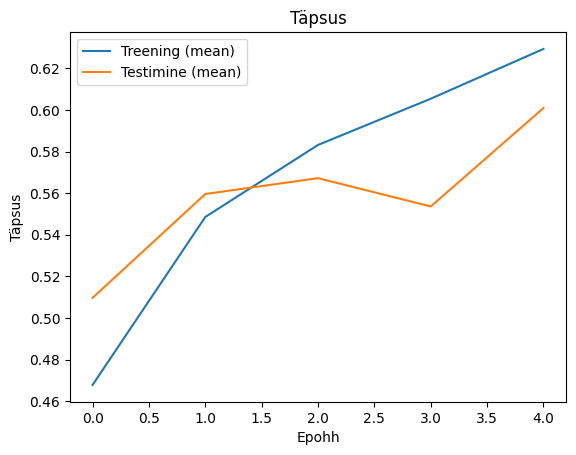

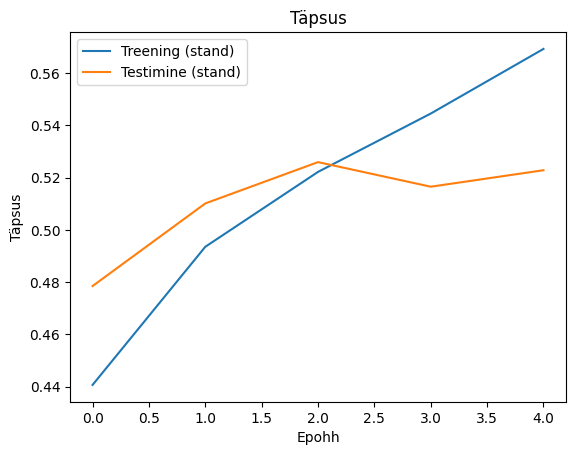

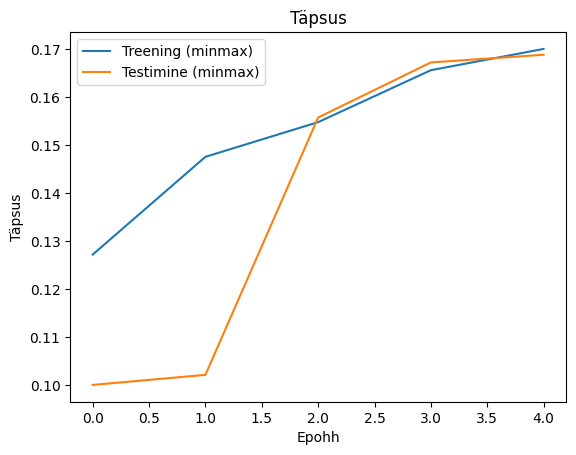

In [ ]:
from matplotlib import pyplot as plt

# First Diagram
plt.figure()
plt.plot(history_mean.history['accuracy'])
plt.plot(history_mean.history['val_accuracy'])
plt.xlabel('Epohh')
plt.ylabel('Täpsus')
plt.legend(['Treening (mean)', 'Testimine (mean)'])
plt.title('Täpsus')

# Second Diagram
plt.figure()
plt.plot(history_stand.history['accuracy'])
plt.plot(history_stand.history['val_accuracy'])
plt.xlabel('Epohh')
plt.ylabel('Täpsus')
plt.legend(['Treening (stand)', 'Testimine (stand)'])
plt.title('Täpsus')

# Third Diagram
plt.figure()
plt.plot(history_minmax.history['accuracy'])
plt.plot(history_minmax.history['val_accuracy'])
plt.xlabel('Epohh')
plt.ylabel('Täpsus')
plt.legend(['Treening (minmax)', 'Testimine (minmax)'])
plt.title('Täpsus')

plt.show()


#### Lühikokkuvõte
Kõige parema täpsuse treeninghulgal ja testhulgal saavutas centering. Standardization oli samuti OK ning graafiku järgi ei sõltunud nii palju epohhidest. Minmaxi sooritus oli kehv.


## Ülesanne 3. Tehisintellekti abil loodud piltide klassifitseerimine

### 3.1. Eeltöötlus

In [ ]:
# Vihje: et genereeritud piltide mõõtmed sobiksid, aitab image = image.reshape((1,32,32,3))

In [ ]:
predicted_classes = []
for image in sizedImages:
  image = image.reshape((1,32,32,3))
  predictions = model.predict(image)
  predicted_class = predictions.argmax()
  predicted_classes.append(predicted_class)
print(predicted_classes)

1/1 [==============================] - 0s 27ms/step
[3, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9]


### 3.2. Klassifitseerimine

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

true_label = prompt
total_predictions_for_label = 0
correct_guesses = 0

for class_index in predicted_classes:
  total_predictions_for_label += 1
  if classes[class_index] == true_label:
    correct_guesses += 1

acc = correct_guesses / total_predictions_for_label
acc

0.8333333333333334

### 3.3. Lühikokkuvõte
**Milline oli täpsus? Millest (arvatavasti) olid tingitud vead?** Mudeli täpsus oli väga hea. Mudeli pakutud klasse uurides on näha, et mudel pakkus klassideks vaid sõiduatuto, veoautot ning kassi. Mudelile on võibolla keeruline selgeks teha, mis eristab veoautot sõiduautost: mõlemal on ju rattad, uksed, aknad, tuled jne. Kassi pakkumisega pani ta aga küll mööda.

[TODO]

## Boonus (vabatahtlik)

In [ ]:
from keras.datasets import cifar10

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


Class: [3] - cat


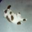

Class: [3] - cat


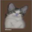

Class: [3] - cat


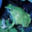

Class: [3] - cat


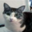

In [ ]:
for cat in [2350, 2401, 2405, 2410]:
    print("Class:", test_labels[cat], "-", classes[test_labels[cat][0]])
    cv2_imshow(test_images[cat])


In [ ]:
from ultralytics import YOLO
model2 = YOLO("yolov9c.pt")

sizedImages = []
for idx in [2350, 2401, 2405, 2410]:
  image = test_images[idx]
  image = np.expand_dims(image, axis=0)  # Add an extra dimension for batch size
  predictions = model2.predict(image)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:3699: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [ ]:
from ultralytics import YOLO
model2 = YOLO("yolov9c.pt")

sizedImages = []
for image in [2350, 2401, 2405, 2410]:
  image = test_labels[image]
  print(image)
  predictions = model.predict(image)
  names = model.names
  img = np.array(image) # image to array representation
  for i in range(len(predictions[0].boxes.cls)):
    coords = [int(x) for x in predictions[0].boxes.xyxy[i]]
    cropped = img[coords[1]:coords[3], coords[0]:coords[2]]
    # Resize the cropped image to 32x32 pixels
    resized = cv.resize(cropped, (32, 32))
    cv2_imshow(resized)
    sizedImages.append(resized)

### Boonusülesande lahenduse kirjeldus ja analüüs

## Kommentaarid kodutööle (vabatahtlik)
[TODO]